
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [357]:
import pandas as pd
import dateutil
import numpy as np
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('C:\\Users\\Jake\\Documents\\ga_home\\project-2\\code/Iowa_Liquor_sales_sample_10pct.csv')

In [358]:
df.shape
#There are 270955 rows and 18 columns

(270955, 18)

In [359]:
df.columns
# Seeing what columns are included

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [360]:
df.dtypes.head()
# Checking out the types here.  

Date              object
Store Number       int64
City              object
Zip Code          object
County Number    float64
dtype: object

In [361]:
df.info()
# There appear to be nulls in County Number, County, Category, Category Name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [362]:
df.describe()
# Describes the numeric values and their descritpive statistics
# Store Number, County Number, Category, Vendor Number,  Item Number (not really relevant)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [363]:
df.describe(include=['object'])
#describes the non-numeric velues

,Date,City,Zip Code,County,Category Name,Item Description,State Bottle Cost,State Bottle Retail,Sale (Dollars)
count,270955,270955,270955,269878,270323,270955,270955,270955,270955
unique,274,385,415,99,71,2173,1086,1112,6580
top,12/1/2015,DES MOINES,50010,Polk,VODKA 80 PROOF,Black Velvet,$8.25,$12.38,$162.00
freq,1555,23724,7091,49102,35373,7233,6160,6160,3482


In [364]:
df['Date'].head(50)

0      11/4/2015
1       3/2/2016
2      2/11/2016
3       2/3/2016
4      8/18/2015
5      4/20/2015
6       8/5/2015
7      6/25/2015
8       1/4/2016
9     11/10/2015
10     9/28/2015
11    10/28/2015
12     1/22/2015
13     2/29/2016
14      1/4/2016
15     6/10/2015
16     2/25/2016
17    12/29/2015
18    12/26/2015
19      3/4/2015
20     1/16/2015
21     1/13/2015
22     3/24/2015
23    11/12/2015
24     3/14/2016
25      2/3/2015
26    11/23/2015
27     4/21/2015
28     12/1/2015
29     1/14/2015
30      4/1/2015
31     1/12/2015
32     1/16/2015
33     1/13/2015
34     6/29/2015
35      4/2/2015
36     4/20/2015
37      6/3/2015
38     1/27/2016
39      3/7/2016
40     3/31/2015
41     2/23/2015
42    10/21/2015
43    10/28/2015
44     1/28/2016
45     4/14/2015
46      8/6/2015
47     6/29/2015
48     1/27/2016
49     1/26/2015
Name: Date, dtype: object

In [365]:
# Creating new columns with the year broken out
df['year'] = pd.DatetimeIndex(df['Date']).year


In [366]:
df['year'].value_counts()

2015    218594
2016     52361
Name: year, dtype: int64

In [367]:
# Creating new columns with the month broken out
df['month'] = pd.DatetimeIndex(df['Date']).month

In [368]:
#I'm using this code to remove the dollar signs and the commas from the curreny
# columns
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace(',','')
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('$','')
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace(',','')
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('$','')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace(',','')
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('$','')
df['State Bottle Cost'] = df['State Bottle Cost'].astype('float')
df['State Bottle Retail'] = df['State Bottle Retail'].astype('float')
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')


In [370]:
df.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'year', 'month'],
      dtype='object')

In [377]:
df.groupby(['year'])['Sale (Dollars)'].sum()

year
2015    2.852725e+07
2016    6.399498e+06
Name: Sale (Dollars), dtype: float64

In [274]:
df.groupby(['year','month'])['Sale (Dollars)'].sum()

year  month
2015  1        1858000.63
      2        2037903.48
      3        2257891.78
      4        2302566.62
      5        2259716.10
      6        2754960.95
      7        2175922.14
      8        2164753.72
      9        2387918.92
      10       2810088.85
      11       2460865.60
      12       3056656.60
2016  1        1880583.53
      2        2214465.01
      3        2304449.02
Name: Sale (Dollars), dtype: float64

In [275]:
df['month_year'] =  df['year'].astype('str')+"-"+ df['month'].astype('str')
df['month_year']
#df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float')

0         2015-11
1          2016-3
2          2016-2
3          2016-2
4          2015-8
5          2015-4
6          2015-8
7          2015-6
8          2016-1
9         2015-11
10         2015-9
11        2015-10
12         2015-1
13         2016-2
14         2016-1
15         2015-6
16         2016-2
17        2015-12
18        2015-12
19         2015-3
20         2015-1
21         2015-1
22         2015-3
23        2015-11
24         2016-3
25         2015-2
26        2015-11
27         2015-4
28        2015-12
29         2015-1
           ...   
270925     2015-1
270926    2015-12
270927     2015-8
270928    2015-10
270929     2016-1
270930    2015-10
270931     2015-5
270932     2015-6
270933     2015-2
270934     2015-3
270935     2015-6
270936     2015-3
270937     2015-1
270938     2015-4
270939     2015-5
270940     2015-1
270941     2015-2
270942     2015-6
270943    2015-10
270944     2016-3
270945     2015-6
270946    2015-11
270947     2015-5
270948     2015-4
270949    

In [301]:
"""def label_quarter (row):
    if row['month_year'] == '2015-1' :
        return '2015 Q1'
    if row['month_year'] == '2015-2' :
        return '2015 Q1'
    if row['month_year'] == '2015-3' :
        return '2015 Q1'
    if row['month_year'] == '2015-4' :
        return '2015 Q2'
    if row['month_year'] == '2015-5' :
        return '2015 Q2'
    if row['month_year'] == '2015-6' :
        return '2015 Q2'
    if row['month_year'] == '2015-7' :
        return '2015 Q3'
    if row['month_year'] == '2015-8' :
        return '2015 Q3'
    if row['month_year'] == '2015-9' :
        return '2015 Q3'
    if row['month_year'] == '2015-10' :
        return '2015 Q4'
    if row['month_year'] == '2015-11' :
        return '2015 Q4'
    if row['month_year'] == '2015-12' :
        return '2015 Q4'
    if row['month_year'] == '2016-1' :
        return '2016 Q1'
    if row['month_year'] == '2016-2' :
        return '2016 Q1'
    if row['month_year'] == '2016-3' :
        return '2016 Q1'
    return 'Other'
df.apply (lambda row: label_quarter (row),axis=1)"""

"def label_quarter (row):\n    if row['month_year'] == '2015-1' :\n        return '2015 Q1'\n    if row['month_year'] == '2015-2' :\n        return '2015 Q1'\n    if row['month_year'] == '2015-3' :\n        return '2015 Q1'\n    if row['month_year'] == '2015-4' :\n        return '2015 Q2'\n    if row['month_year'] == '2015-5' :\n        return '2015 Q2'\n    if row['month_year'] == '2015-6' :\n        return '2015 Q2'\n    if row['month_year'] == '2015-7' :\n        return '2015 Q3'\n    if row['month_year'] == '2015-8' :\n        return '2015 Q3'\n    if row['month_year'] == '2015-9' :\n        return '2015 Q3'\n    if row['month_year'] == '2015-10' :\n        return '2015 Q4'\n    if row['month_year'] == '2015-11' :\n        return '2015 Q4'\n    if row['month_year'] == '2015-12' :\n        return '2015 Q4'\n    if row['month_year'] == '2016-1' :\n        return '2016 Q1'\n    if row['month_year'] == '2016-2' :\n        return '2016 Q1'\n    if row['month_year'] == '2016-3' :\n      

In [302]:
#df['label_quarter'] = df.apply (lambda row: label_quarter (row),axis=1)

In [303]:
# Seeing a wide variation in the  amount of liquor sold by cat.  Probably irrelevant
print(df['Category Name'].value_counts())

VODKA 80 PROOF                        35373
CANADIAN WHISKIES                     27087
STRAIGHT BOURBON WHISKIES             15342
SPICED RUM                            14631
VODKA FLAVORED                        14001
TEQUILA                               12109
BLENDED WHISKIES                      11547
WHISKEY LIQUEUR                       10902
IMPORTED VODKA                        10668
PUERTO RICO & VIRGIN ISLANDS RUM      10062
FLAVORED RUM                           7282
TENNESSEE WHISKIES                     7081
AMERICAN COCKTAILS                     6929
AMERICAN GRAPE BRANDIES                6589
AMERICAN DRY GINS                      6559
IMPORTED VODKA - MISC                  6506
MISC. IMPORTED CORDIALS & LIQUEURS     6299
CREAM LIQUEURS                         6284
SCOTCH WHISKIES                        5375
IMPORTED GRAPE BRANDIES                4614
IMPORTED SCHNAPPS                      4249
MISC. AMERICAN CORDIALS & LIQUEURS     3394
100 PROOF VODKA                 

In [304]:
def categorize(item):   
    try: 
        if 'VODKA' in item:
            return 'VODKA'
        elif 'RUM' in item:
            return 'RUM'
        elif 'WHISK' in item:
            return 'WHISKIE'
        elif 'BRANDIE' in item:
            return 'BRANDIE'
        elif 'GIN' in item:
            return 'GIN'
        elif 'SCHNAP' in item:
            return 'SCHNAPPS'
        elif 'SCOTCH' in item:
            return 'SCOTCH'
        elif 'TEQUILA' in item:
            return 'TEQUILA'
        else: 
            'OTHER'
    except:
        pass

In [305]:
categorize(df['Category Name'])

In [306]:
df['liquor types'] = df['Category Name'].apply(categorize)

In [307]:
df['liquor types']

0          BRANDIE
1          WHISKIE
2          WHISKIE
3             None
4            VODKA
5              GIN
6          BRANDIE
7          WHISKIE
8            VODKA
9         SCHNAPPS
10         WHISKIE
11            None
12         WHISKIE
13        SCHNAPPS
14           VODKA
15         BRANDIE
16           VODKA
17           VODKA
18            None
19         WHISKIE
20           VODKA
21         WHISKIE
22         WHISKIE
23         TEQUILA
24           VODKA
25         WHISKIE
26         WHISKIE
27         WHISKIE
28           VODKA
29         WHISKIE
            ...   
270925        None
270926     TEQUILA
270927       VODKA
270928       VODKA
270929       VODKA
270930       VODKA
270931        None
270932     WHISKIE
270933         RUM
270934     BRANDIE
270935     WHISKIE
270936     TEQUILA
270937        None
270938       VODKA
270939       VODKA
270940     WHISKIE
270941       VODKA
270942     WHISKIE
270943     WHISKIE
270944        None
270945         RUM
270946      

In [308]:
print(df['City'].value_counts())
# investigating how many records for each city

DES MOINES         23724
CEDAR RAPIDS       18888
DAVENPORT          11580
WATERLOO            8425
COUNCIL BLUFFS      8060
SIOUX CITY          7992
IOWA CITY           7951
AMES                7548
WEST DES MOINES     7162
DUBUQUE             6915
CEDAR FALLS         5735
ANKENY              4836
MASON CITY          4191
BETTENDORF          3709
CORALVILLE          3490
MUSCATINE           3397
BURLINGTON          3144
CLINTON             3111
FORT DODGE          2989
WINDSOR HEIGHTS     2811
MARSHALLTOWN        2694
NEWTON              2544
STORM LAKE          2533
MARION              2489
URBANDALE           2438
OTTUMWA             2295
JOHNSTON            2141
ALTOONA             2113
CLEAR LAKE          2083
SPENCER             1910
                   ...  
GILMORE CITY          16
DANVILLE              15
SCHALLER              15
GOLDFIELD             15
VAN METER             15
WASHBURN              15
ALTA                  14
WALL LAKE             14
DOWS                  13


In [309]:
#need to change dollars to float
df['Sale (Dollars)'] = df['Sale (Dollars)'].astype('float') 


In [310]:
DESMOINES = pd.get_dummies(df['City']=='DES MOINES',prefix ='DES_MOINES',drop_first=True)

In [311]:
df = pd.concat([df,DESMOINES], axis=1)

In [312]:
CEDAR_RAP = pd.get_dummies(df['City']=='CEDAR RAPIDS',prefix ='CEDAR_RAP',drop_first=True)

In [313]:
df = pd.concat([df,CEDAR_RAP], axis=1)

In [314]:
DAVENPORT_T = pd.get_dummies(df['City']=='DAVENPORT',prefix ='DAVEN',drop_first=True)

In [315]:
df = pd.concat([df,DAVENPORT_T], axis=1)

In [316]:
WATERLOO_T = pd.get_dummies(df['City']=='WATERLOO',prefix ='WATERLOO',drop_first=True)

In [317]:
df = pd.concat([df,WATERLOO_T], axis=1)

In [318]:
COUNCIL_BLUFFS_T = pd.get_dummies(df['City']=='COUNCIL BLUFFS',prefix ='COUNCIL_BLUFFS',drop_first=True)

In [319]:
df = pd.concat([df,COUNCIL_BLUFFS_T], axis=1)

In [320]:
#Q1_2015 = pd.get_dummies(df['label_quarter'],prefix ='d',drop_first=False)

In [321]:
#df = pd.concat([df,Q1_2015], axis=1)

In [322]:
df.columns

Index(['Date', 'Store Number', 'City', 'Zip Code', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Item Number',
       'Item Description', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)',
       'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'year', 'month',
       'month_year', 'liquor types', 'DES_MOINES_True', 'CEDAR_RAP_True',
       'DAVEN_True', 'WATERLOO_True', 'COUNCIL_BLUFFS_True', 'DES_MOINES_True',
       'CEDAR_RAP_True', 'DAVEN_True', 'WATERLOO_True', 'COUNCIL_BLUFFS_True'],
      dtype='object')

In [323]:
df.groupby(['Store Number']).size()

Store Number
2106     654
2113     184
2130     509
2152     171
2178     295
2190    1626
2191     739
2200     485
2205     288
2228     306
2233     290
2238      71
2248     560
2285     358
2290    1041
2327     234
2353     414
2367      45
2413     606
2445     200
2448     505
2459     133
2460     397
2465     461
2475     106
2478     107
2487     409
2498      76
2500    1521
2501    1553
        ... 
5211      19
5212      28
5213      13
5214      12
5215      56
5216       3
5217       6
5218       2
5220      61
5222      33
5223       3
5224      20
5225      14
5226      13
5227      27
5229       5
5230      65
5232       4
5233       4
5234       3
5236      49
5237       6
5240       7
5247       7
9001      24
9002      49
9010      17
9013       6
9018       1
9023       1
Length: 1400, dtype: int64

In [324]:
df.groupby(['year','month'])['Sale (Dollars)'].sum()

year  month
2015  1        1858000.63
      2        2037903.48
      3        2257891.78
      4        2302566.62
      5        2259716.10
      6        2754960.95
      7        2175922.14
      8        2164753.72
      9        2387918.92
      10       2810088.85
      11       2460865.60
      12       3056656.60
2016  1        1880583.53
      2        2214465.01
      3        2304449.02
Name: Sale (Dollars), dtype: float64

In [325]:
grouped_city = df['Sale (Dollars)'].groupby(store_data['City']).sum()
grouped_city.sort_values(ascending=False)

NameError: name 'store_data' is not defined

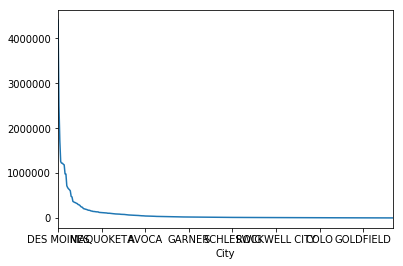

In [326]:
grouped_city.sort_values(ascending=False).plot()
# Can see that the there are several cities that have the majority of state sales

In [327]:
store_data['Sale (Dollars)'].groupby(store_data['County']).sum()
grouped_county = df['Sale (Dollars)'].groupby(store_data['County']).sum()
grouped_county.sort_values(ascending=False)

NameError: name 'store_data' is not defined

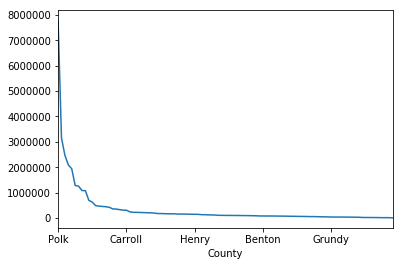

In [328]:
grouped_county.sort_values(ascending=False).plot()
# Can see that the there are several counties that have the majority of state sales

In [329]:
df.groupby(['year','month'])['Sale (Dollars)'].sum()
#fml - motivated to murder pandas

year  month
2015  1        1858000.63
      2        2037903.48
      3        2257891.78
      4        2302566.62
      5        2259716.10
      6        2754960.95
      7        2175922.14
      8        2164753.72
      9        2387918.92
      10       2810088.85
      11       2460865.60
      12       3056656.60
2016  1        1880583.53
      2        2214465.01
      3        2304449.02
Name: Sale (Dollars), dtype: float64

In [330]:
df['Item Description'].value_counts()

Black Velvet                              7233
Hawkeye Vodka                             6689
Five O'clock Vodka                        4512
Smirnoff Vodka 80 Prf                     3435
Captain Morgan Spiced Rum                 3356
Seagrams 7 Crown Bl Whiskey               3280
Fireball Cinnamon Whiskey                 3198
Jack Daniels Old #7 Black Lbl             3106
Absolut Swedish Vodka 80 Prf              2918
Bacardi Superior Rum                      2813
Admiral Nelson Spiced Rum                 2811
Jim Beam                                  2725
Mccormick Vodka Pet                       2520
Jagermeister Liqueur                      2420
Crown Royal Canadian Whisky               2299
Five Star                                 2294
Grey Goose Vodka                          2270
Paramount White Rum                       2261
Jose Cuervo Especial Reposado Tequila     2205
Southern Comfort                          2095
Uv Blue (raspberry) Vodka                 2072
Malibu Coconu

In [331]:
#df_clean = df.dropna(subset = ['County Number', 'County','Date','Store Number',
                            #  'City', 'Zip Code', 'County Number', 'County',
                             #  'Category', 'Category Name', 'Vendor Number', 
                              # 'Item Number','Item Description','month_year',
                               #'liquor types'], inplace=True)

df.drop(['County Number', 'County','Date','Store Number',
                              'City', 'Zip Code', 'County Number', 'County',
                               'Category', 'Category Name', 'Vendor Number', 
                               'Item Number','Item Description','month_year','label_quarter',
                               'liquor types','Quarters', 'd_2015 Q2', 'd_2015 Q3', 'd_2015 Q4', 'd_2016 Q1'], axis=1, inplace=True)


In [332]:
df.columns

Index(['Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)',
       'Volume Sold (Gallons)', 'year', 'month', 'DES_MOINES_True',
       'CEDAR_RAP_True', 'DAVEN_True', 'WATERLOO_True', 'COUNCIL_BLUFFS_True',
       'DES_MOINES_True', 'CEDAR_RAP_True', 'DAVEN_True', 'WATERLOO_True',
       'COUNCIL_BLUFFS_True'],
      dtype='object')

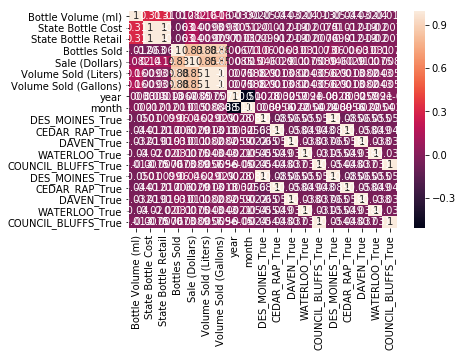

In [333]:
corr = df.corr()
sns.heatmap(corr, annot=True);
# It looks like the important variables are 'Bottles Sold', 'Volume Sold (liters).
# It seems as though 'Bottles Sold' and 'Volume' are almost measuring the same thing
# Volume Sold (Gallon) was also correlated, but same as liters, just dif units
# I'm not sure how to use categorical data such as city, county, category
# State bottle tax and cost appear to be related

In [334]:
df.describe(include='all')

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,DES_MOINES_True,CEDAR_RAP_True,DAVEN_True,WATERLOO_True,COUNCIL_BLUFFS_True,DES_MOINES_True,CEDAR_RAP_True,DAVEN_True,WATERLOO_True,COUNCIL_BLUFFS_True
count,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830,2015.193246,5.821103,0.087557,0.069709,0.042738,0.031094,0.029747,0.087557,0.069709,0.042738,0.031094,0.029747
std,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182,0.394845,3.621291,0.282650,0.254656,0.202266,0.173571,0.169888,0.282650,0.254656,0.202266,0.173571,0.169888
min,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000,2015.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000,2015.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000,2015.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000,2016.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [335]:
df_2015 = df.loc[df['year'] == 2015]
df_2015.dtypes


Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
year                       int64
month                      int64
DES_MOINES_True            uint8
CEDAR_RAP_True             uint8
DAVEN_True                 uint8
WATERLOO_True              uint8
COUNCIL_BLUFFS_True        uint8
DES_MOINES_True            uint8
CEDAR_RAP_True             uint8
DAVEN_True                 uint8
WATERLOO_True              uint8
COUNCIL_BLUFFS_True        uint8
dtype: object

In [336]:
df_2016 = df.loc[df['year'] == 2016]
df_2016.shape

(52361, 19)

# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

Need to clean this up by bringing a lot of the stuff before this section down into this EDA section

In [337]:
y_train = df_2015['Sale (Dollars)']
x_train = df_2015.drop(['Sale (Dollars)'], axis = 'columns')

In [338]:
x_train.tail()

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons),year,month,DES_MOINES_True,CEDAR_RAP_True,DAVEN_True,WATERLOO_True,COUNCIL_BLUFFS_True,DES_MOINES_True,CEDAR_RAP_True,DAVEN_True,WATERLOO_True,COUNCIL_BLUFFS_True
270950,300,20.30,30.45,4,1.20,0.32,2015,12,1,0,0,0,0,1,0,0,0,0
270951,750,7.47,11.21,3,2.25,0.59,2015,11,0,0,0,0,0,0,0,0,0,0
270952,750,15.07,22.61,6,4.50,1.19,2015,10,0,0,0,1,0,0,0,0,1,0
270953,1750,26.05,39.08,6,10.50,2.77,2015,11,0,0,0,0,0,0,0,0,0,0
270954,200,2.75,4.13,8,1.60,0.42,2015,1,0,0,0,0,0,0,0,0,0,0


In [339]:
# Baseline - no idea what the baseline is supposed to be
# predicting yearly sales.  I'm guessing I want my baseline to be the accuracy
# with which i predict....but given that I have the data, huhhhh?
df_2015['Sale (Dollars)'].sum()

28527245.39000142

In [340]:
from sklearn.preprocessing import StandardScaler

In [341]:
ss = StandardScaler()
xs = ss.fit_transform(x_train)

In [342]:
x_train.dtypes

Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
year                       int64
month                      int64
DES_MOINES_True            uint8
CEDAR_RAP_True             uint8
DAVEN_True                 uint8
WATERLOO_True              uint8
COUNCIL_BLUFFS_True        uint8
DES_MOINES_True            uint8
CEDAR_RAP_True             uint8
DAVEN_True                 uint8
WATERLOO_True              uint8
COUNCIL_BLUFFS_True        uint8
dtype: object

In [343]:
lm = linear_model.LinearRegression(fit_intercept=True,
                                   normalize=False,
                                   copy_X=True,
                                   n_jobs=1)

In [344]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [345]:

lm.score(x_train,y_train) #this result is R^2, the fraction of variance explained by the model

0.76515828129600783

In [346]:
lm.coef_

array([ -3.81906141e-02,   3.74967911e+01,  -1.87914230e+01,
         5.97019097e+00,   2.28475469e+02,  -8.39132577e+02,
        -2.57216470e-12,   3.91307915e-01,   3.05272099e+00,
        -1.29432635e-01,  -2.17492084e+00,  -5.61704211e+00,
         3.47097815e+00,   3.05272099e+00,  -1.29432635e-01,
        -2.17492084e+00,  -5.61704211e+00,   3.47097815e+00])

In [355]:
predicted = lm.predict(X=indep) # creates 'y_hat' ie list of prediction based on model

NameError: name 'indep' is not defined

In [348]:
true = dep 

NameError: name 'dep' is not defined

In [350]:
metrics.r2_score(y_pred = predicted,
                 y_true = true)

NameError: name 'predicted' is not defined

In [351]:
y_test = df_2016['Sale (Dollars)']
x_test = df_2016.drop(['Sale (Dollars)'], axis = 'columns')

In [352]:

lm.score(x_test,y_test) #this result is R^2, the fraction of variance explained by the model

0.79141726939342316

In [353]:
predicted = lm.predict(x_test)
df_predict = pd.DataFrame(predicted)


In [354]:
predicted.sum()*4


25745211.492277984

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.